# Finding the shortest path between different routes: Case study of US airlines

The dataset can be found here https://github.com/kaharbawa35/BawaTech

In [127]:
import pandas as pd
import numpy 
data=pd.read_csv("airlines_network_optimization.csv")
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            100 non-null    int64  
 1   month           100 non-null    int64  
 2   day             100 non-null    int64  
 3   dep_time        99 non-null     float64
 4   sched_dep_time  100 non-null    int64  
 5   dep_delay       99 non-null     float64
 6   arr_time        99 non-null     float64
 7   sched_arr_time  100 non-null    int64  
 8   arr_delay       99 non-null     float64
 9   carrier         100 non-null    object 
 10  flight          100 non-null    int64  
 11  tailnum         100 non-null    object 
 12  origin          100 non-null    object 
 13  dest            100 non-null    object 
 14  air_time        99 non-null     float64
 15  distance        100 non-null    int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 12.6+ KB


In [129]:
# We have 1 missing value in the following features:
data.isna().sum()

year              0
month             0
day               0
dep_time          1
sched_dep_time    0
dep_delay         1
arr_time          1
sched_arr_time    0
arr_delay         1
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          1
distance          0
dtype: int64

# Feature engineering

In [130]:
# converting sched_dep_time to 'std' - Scheduled time of departure
import warnings
warnings.filterwarnings('ignore')
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [131]:
# converting dep_time to 'atd' - Actual time of departure and replacing the missing values with zero (0)
import warnings
warnings.filterwarnings('ignore')
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting arr_time to 'ata' - Actual time of arrival and replacing the missing values with zero (0)
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [132]:
data.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata
95,2013,11,29,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00
96,2013,3,10,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00
97,2013,11,25,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00
98,2013,3,5,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,9:29:00,14:26:00,9:30:00,14:21:00
99,2013,5,21,626.0,630,-4.0,858.0,918,-20.0,UA,490,N447UA,LGA,IAH,189.0,1416,6:30:00,9:18:00,6:26:00,8:58:00


In [133]:
# merging 'year', 'month', 'day' columns to 'date' column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# we drop the 'year', 'month', 'day' columns as we don't need them any more
data = data.drop(columns = ['year', 'month', 'day'])

In [134]:
data.tail()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
95,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010,11:35:00,14:36:00,11:29:00,14:14:00,2013-11-29
96,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454,10:29:00,13:44:00,10:29:00,13:00:00,2013-03-10
97,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187,17:25:00,18:45:00,17:24:00,18:28:00,2013-11-25
98,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608,9:29:00,14:26:00,9:30:00,14:21:00,2013-03-05
99,626.0,630,-4.0,858.0,918,-20.0,UA,490,N447UA,LGA,IAH,189.0,1416,6:30:00,9:18:00,6:26:00,8:58:00,2013-05-21


# Formulating the network to be optimized and creating edge list of all routes

In [135]:
import networkx as nx
Net = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

# Ploting the network

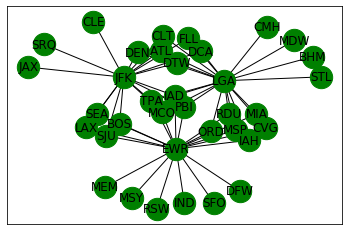

In [136]:
Net.nodes()
Net.edges()
nx.draw_networkx(Net, with_labels=True,node_size=500, node_color='g') 

As expected we can see that we have 3 busy airports from this graph: JFK, LGA, EWR which by the way are our origin airports

In [137]:
nx.algorithms.degree_centrality(Net) # Notice the 3 airports from which all of our 100 rows of data originates

{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

In [138]:
nx.density(Net) # Average edge density of the Graphs

0.09047619047619047

In [139]:
nx.average_shortest_path_length(Net) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [140]:
nx.average_degree_connectivity(Net) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

# Shortest path between JFK to DFW

Let's first find all the possible paths available from 'JAX' to 'DFW'. Then calculates the "dijkstra" path from 'JAX' to 'DFW' which would be the shortest paths between the two airports. Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a graph, which may represent, for example, road networks. And lastly I will find the dijkstra path from 'JAX' to 'DFW' by airtime.

In [141]:
# Let's find all possible paths available
for path in nx.all_simple_paths(Net, source='JAX', target='DFW'):
 print(path)


['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [142]:
# Let's  find the dijkstra path from JAX to DFW
dijpath = nx.dijkstra_path(Net, source='JAX', target='DFW')
dijpath


['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [143]:
# Let's find the dijkstra path weighted by airtime from JAX to DFW (approximation)
shortpath = nx.dijkstra_path(Net, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

In [144]:
# Let's find the dijkstra path weighted by distance from JAX to DFW
shortpath = nx.dijkstra_path(Net, source='JAX', target='DFW', weight='distance')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']